In [50]:
import pandas as pd
import seaborn as sns
import wordcloud
import matplotlib as plt
df = pd.read_csv('Artificial Intelligence in Education (Responses) - Form Responses 1 (1).csv')
#removed as not used in survey
df.drop(columns=['Your Age Range','Your Gender'], inplace=True)
df.dropna(subset=['Timestamp'],inplace=True)

In [51]:
%matplotlib inline

In [52]:
df.head()

,Timestamp,What is your position in a School/Academy/Trust?,How many years experience do you have in education?,What is your interest in Artificial Intelligence and its use in education?,Which of the following options is the most appropriate explanation of AI as of today?,Which of the following options is the most appropriate explanation of what AI can do as of today?,Which of the following options is the most appropriate explanation of who AI developers are as of today?,Do you agree or disagree that artificial intelligence could be helpful in education?,If AI was to be used to support decisions made by teachers in the classroom about individual students would you trust it? (An example would be whether a student would be likely to pass or achieve their target grade),Is there any particular reason for your judgement above?,"If you were provided a reason for this prediction (e.g low attendance, poor behaviour) would you be more likely to trust this prediction?",Is there any particular reason for your judgement above?.1,There are two options of how AI can be explainable to an end user. Which do you feel is more valuable as a leader or teacher?,Phase of Education,Diff
0,3/16/2022 13:13:17,Head of Department,10-14,5.0,is a field that aims to collect data,Language understanding and problem-solving,Information researchers and scientists,Strongly agree,4.0,It would make the best suggestion of the outco...,4.0,As above,Local: Shows the approximate reasons why an in...,FE,0
1,3/16/2022 13:42:14,EdTech,10-14,4.0,is a field that aims to develop intelligent ma...,Language understanding and problem-solving,Information researchers and scientists,Agree,4.0,Would want to know the underlying rationale.,5.0,Haha! See above.,Local: Shows the approximate reasons why an in...,NaN,1
2,3/16/2022 13:53:40,Support Staff,15-19,5.0,is a field that aims to develop intelligent ma...,It makes it's own decisions,Information researchers and scientists,Agree,3.0,Highly contingent on range/quality of input data,3.0,Devil is in the detail,Global: Shows the important features for the p...,Secondary,0
3,3/16/2022 13:59:38,Support Staff,10-14,4.0,is a field that aims to collect data,Language understanding and problem-solving,Information researchers and scientists,Agree,3.0,Algorithms will only work from the information...,4.0,More time would have been spent being able to ...,Local: Shows the approximate reasons why an in...,Secondary,1
4,3/16/2022 14:13:28,Director,15-19,4.0,is a field that aims to develop intelligent ma...,Language understanding and problem-solving,Information researchers and scientists,Agree,3.0,I would judge any AI on it's merits. I'd give ...,4.0,Contextual explanation would increase my confi...,Global: Shows the important features for the p...,3-16 years old,1


In [53]:
df['Do you agree or disagree that artificial intelligence could be helpful in education?'].value_counts()

Agree                37
Strongly agree       17
Neutral              12
Strongly disagree     3
Disagree              2
Name: Do you agree or disagree that artificial intelligence could be helpful in education?, dtype: int64

In [54]:
mapping = {'Strongly disagree': 1, 'Disagree': 2,'Neutral' : 3, 'Agree' :4, 'Strongly agree':5}

In [55]:
df.replace({'Do you agree or disagree that artificial intelligence could be helpful in education?': mapping})

,Timestamp,What is your position in a School/Academy/Trust?,How many years experience do you have in education?,What is your interest in Artificial Intelligence and its use in education?,Which of the following options is the most appropriate explanation of AI as of today?,Which of the following options is the most appropriate explanation of what AI can do as of today?,Which of the following options is the most appropriate explanation of who AI developers are as of today?,Do you agree or disagree that artificial intelligence could be helpful in education?,If AI was to be used to support decisions made by teachers in the classroom about individual students would you trust it? (An example would be whether a student would be likely to pass or achieve their target grade),Is there any particular reason for your judgement above?,"If you were provided a reason for this prediction (e.g low attendance, poor behaviour) would you be more likely to trust this prediction?",Is there any particular reason for your judgement above?.1,There are two options of how AI can be explainable to an end user. Which do you feel is more valuable as a leader or teacher?,Phase of Education,Diff
0,3/16/2022 13:13:17,Head of Department,10-14,5.0,is a field that aims to collect data,Language understanding and problem-solving,Information researchers and scientists,5,4.0,It would make the best suggestion of the outco...,4.0,As above,Local: Shows the approximate reasons why an in...,FE,0
1,3/16/2022 13:42:14,EdTech,10-14,4.0,is a field that aims to develop intelligent ma...,Language understanding and problem-solving,Information researchers and scientists,4,4.0,Would want to know the underlying rationale.,5.0,Haha! See above.,Local: Shows the approximate reasons why an in...,NaN,1
2,3/16/2022 13:53:40,Support Staff,15-19,5.0,is a field that aims to develop intelligent ma...,It makes it's own decisions,Information researchers and scientists,4,3.0,Highly contingent on range/quality of input data,3.0,Devil is in the detail,Global: Shows the important features for the p...,Secondary,0
3,3/16/2022 13:59:38,Support Staff,10-14,4.0,is a field that aims to collect data,Language understanding and problem-solving,Information researchers and scientists,4,3.0,Algorithms will only work from the information...,4.0,More time would have been spent being able to ...,Local: Shows the approximate reasons why an in...,Secondary,1
4,3/16/2022 14:13:28,Director,15-19,4.0,is a field that aims to develop intelligent ma...,Language understanding and problem-solving,Information researchers and scientists,4,3.0,I would judge any AI on it's merits. I'd give ...,4.0,Contextual explanation would increase my confi...,Global: Shows the important features for the p...,3-16 years old,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,3/18/2022 7:16:12,Head of Department,5-9,4.0,is a field that aims to develop intelligent ma...,Language understanding and problem-solving,Information researchers and scientists,3,3.0,Need more understanding,3.0,Need experience to see if can trust,Local: Shows the approximate reasons why an in...,Secondary,0
67,3/18/2022 11:38:23,Teacher,15-19,2.0,is a field that aims to develop intelligent ma...,It makes it's own decisions,Information researchers and scientists,4,4.0,NaN,4.0,NaN,Global: Shows the important features for the p...,Secondary,0
68,3/18/2022 11:38:35,Head of Department,5-9,5.0,is a field that aims to develop intelligent ma...,Language understanding and problem-solving,Information researchers and scientists,5,4.0,We use our own algorithms now to work it out o...,5.0,NaN,Local: Shows the approximate reasons why an in...,"Secondary, Sixth Form",1
69,3/18/2022 12:02:45,"Teacher, Head of Department, Leader",15-19,5.0,is a field that aims to develop intelligent ma...,Language understanding and problem-solving,Information researchers and scientists,5,4.0,I have automated systems of my own so know its...,5.0,You are adding the reason,Global: Shows

In [28]:
df.describe()

,What is your interest in Artificial Intelligence and its use in education?,If AI was to be used to support decisions made by teachers in the classroom about individual students would you trust it? (An example would be whether a student would be likely to pass or achieve their target grade),"If you were provided a reason for this prediction (e.g low attendance, poor behaviour) would you be more likely to trust this prediction?",Diff
count,71.000000,71.000000,71.000000,114.000000
mean,3.633803,3.211268,3.774648,0.350877
std,1.221702,0.908932,0.865154,0.609402
min,1.000000,1.000000,1.000000,-1.000000
25%,3.000000,3.000000,3.000000,0.000000
50%,4.000000,3.000000,4.000000,0.000000
75%,5.000000,4.000000,4.000000,1.000000
max,5.000000,5.000000,5.000000,3.000000


In [49]:
df.rename(columns={x:y for x,y in zip(df.columns,range(0,len(df.columns)))})


In [29]:
from scipy.stats import wilcoxon
#differences
w, p = wilcoxon(df['If AI was to be used to support decisions made by teachers in the classroom about individual students would you trust it? (An example would be whether a student would be likely to pass or achieve their target grade)'])

In [30]:
w, p

(0.0, 1.3287563876726969e-20)

In [36]:
def w_result(p):
    if p < 0.05:
        print('result is significant')
    else:
        print('result is not significant')

In [40]:
w_result(p)

result is significant


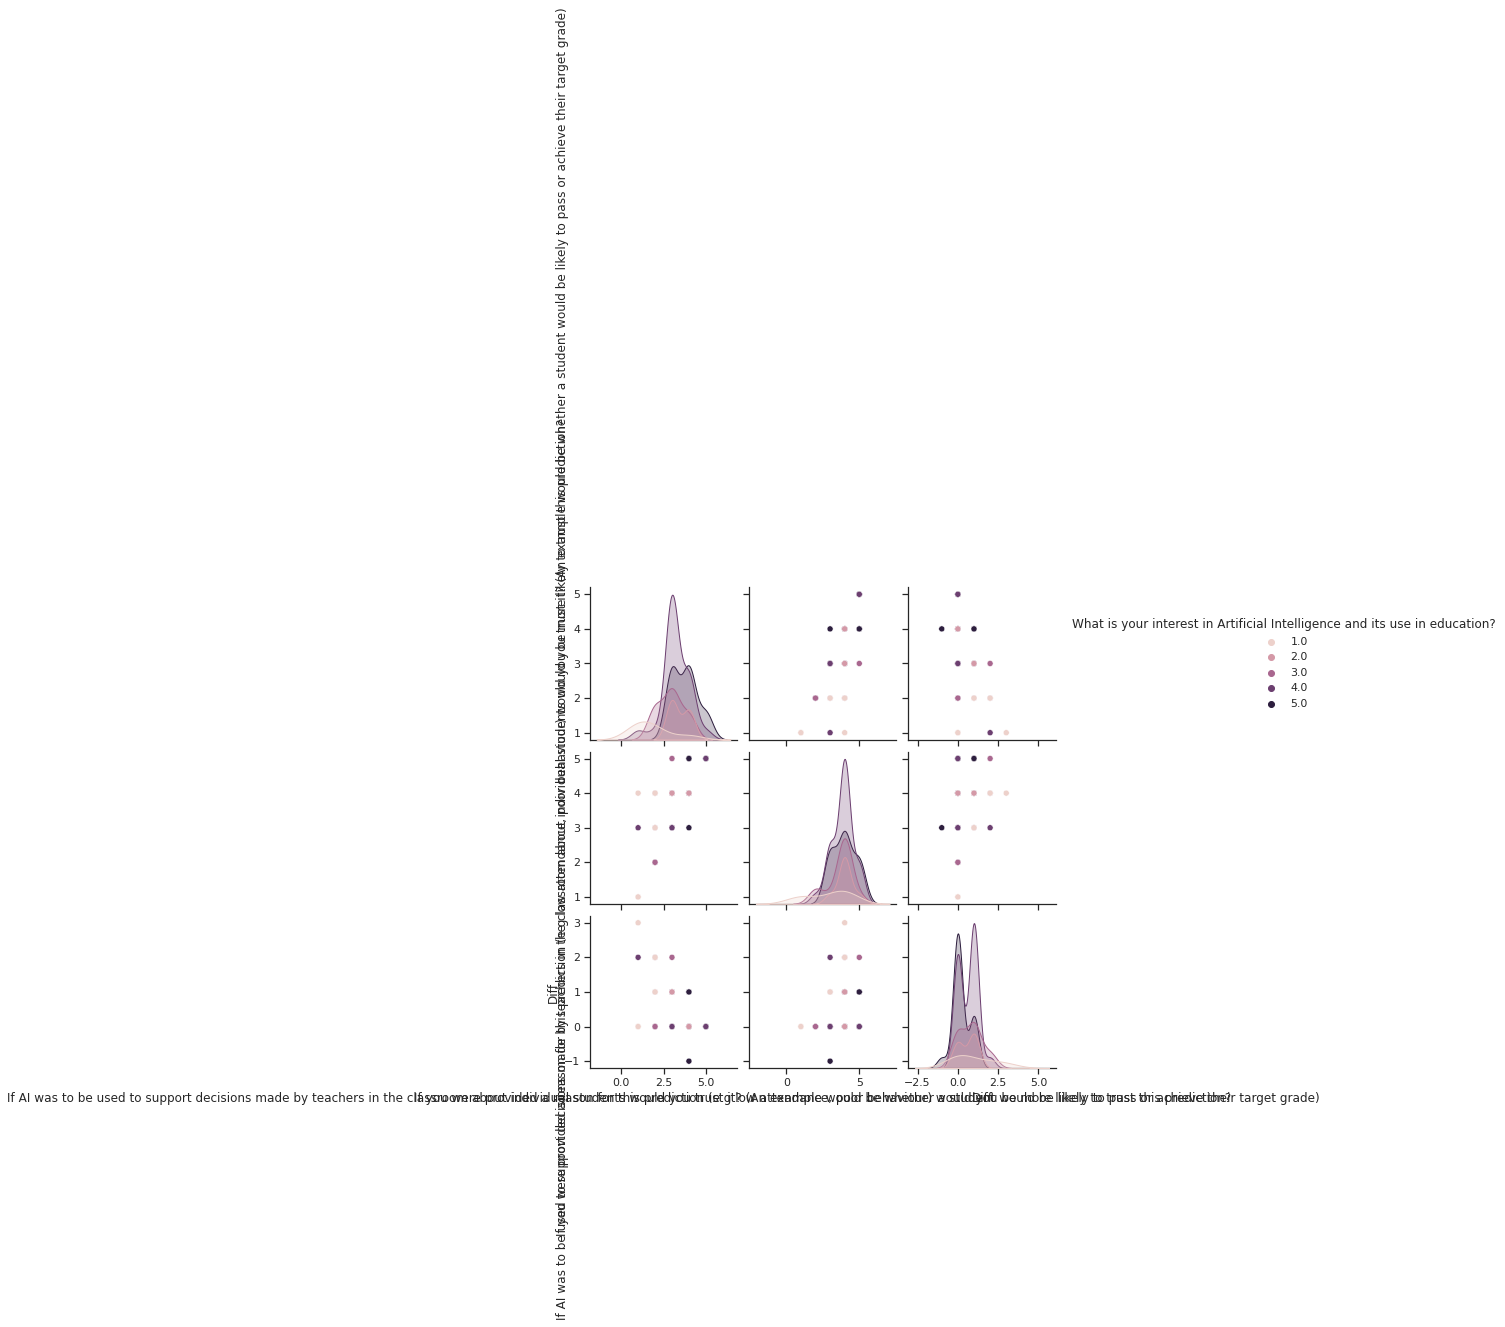

In [39]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="What is your interest in Artificial Intelligence and its use in education?")